# Section 5 - Midterm 1 Review
This notebook is a review notebook. In order to serve the purpose of recalling and internalizing knowledge, the section should involve more discussion than usual, between all people in the class, whether students or TA. Most of the code is written for you. Some blanks are meant to be filled, and you should fill them in yourself or discuss as a group before filling in and running the cell.

We will recap:
1. Sampling
2. Linear Regression
3. PCA

You should have downloaded:
- spikes.csv

In [1]:
import numpy as np
from scipy.stats import beta, norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1 Sampling
Two different ways to compare samples and their potential distribution:  

a. sample histogram vs pdf from candidate distribution  

b. sample histogram vs histogram from NEW samples of candidate distribution

## 1.1: Sample is beta(a,b) but candidate is normal
### a. sample histogram vs pdf from candidate distribution
Run the code cell below and experiment (just for fun) with different a and b parameters.

_(It is recommended to write your responses to the following prompts on the black/whiteboard or your paper. We will compare and contrast with future examples.)_

**Discuss:**
- What do you observe about each of the comparison between sample data and normal pdf?
- What are the differences between the tail behavior? In particular, what values does beta distribution do not take that normal distribution takes?
- How do your observations tell you that the samples probably are not from beta?

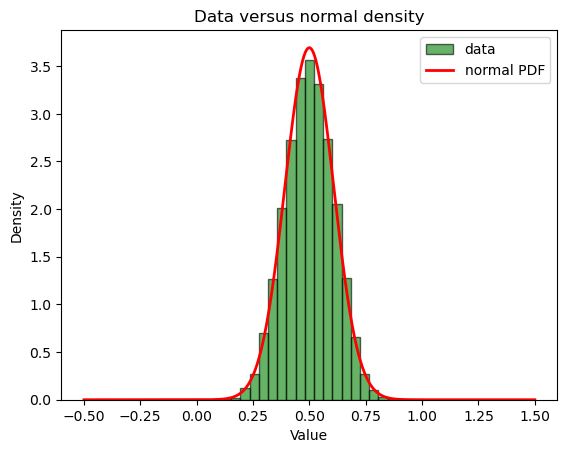

In [2]:
import numpy as np
# Set the parameters
# smaller alpha gives left-skew. You can play around with four cases:
#   - small/big a, small/big b, where a,b>0
a, b = 10, 10  

# generate data from beta
ndata = 10000 
# TODO generate ndata samples from beta(a,b)
data1 = np.random.beta(a, b, ndata)
# sample mean and std
# TODO compute mean and unbiased standard deviation
mean, std = np.mean(data1), np.std(data1, ddof=1)

# plot
xmin, xmax = -0.5, 1.5
bin = np.linspace(xmin,xmax,50)

plt.hist(data1, bins=bin, range=(0,1), density=True, alpha=0.6, color='g', edgecolor='black', label='data')
plt.plot(np.linspace(xmin,xmax,1000), norm.pdf(np.linspace(xmin,xmax,1000),loc=mean, scale=std),'r-', lw=2, label='normal PDF')
plt.title('Data versus normal density'); plt.xlabel('Value'); plt.ylabel('Density'); plt.legend(); plt.show()

### b. sample histogram vs histogram from NEW samples of candidate distribution

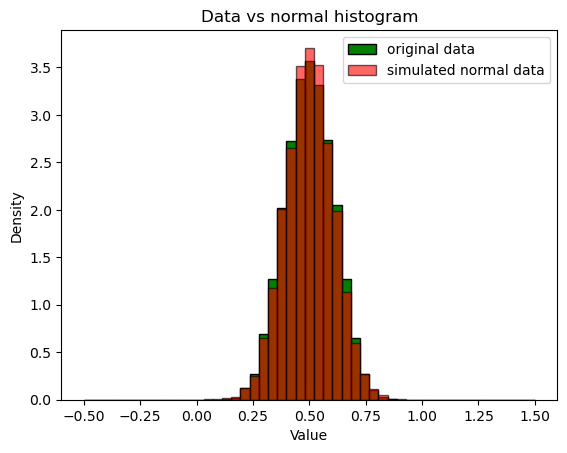

In [3]:
# sample from normal with sample mean and std
# TODO generate ndata samples from normal(mean,std)
data1_prime = np.random.normal(mean, std, ndata)

# plot
plt.hist(data1, bins=bin, density=True, alpha=1, color='g', edgecolor='black', label='original data')
plt.hist(data1_prime, bins=bin, density=True, alpha=0.6, color='r', edgecolor='black', label='simulated normal data')
plt.title('Data vs normal histogram'); plt.xlabel('Value'); plt.ylabel('Density'); plt.legend(); plt.show()


## 1.2: Sample is normal and candidate also normal
### a. sample histogram vs pdf from candidate distribution
**Discuss:**
- What are some good indicators that the data is indeed normally distributed? List explicitly how these were different from the beta example.

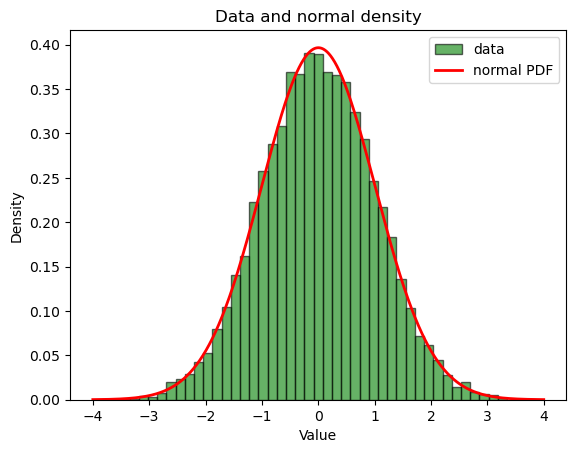

In [4]:
# Set the parameters for the normal distribution
mu, sigma = 0, 1

# generate data from normal
data2 = norm.rvs(loc=mu, scale=sigma, size=ndata)   # TODO

# sample mean and std
mean, std = np.mean(data2), np.std(data2, ddof=1)  # TODO

# plot
xmin, xmax = -4, 4
bin = np.linspace(xmin,xmax,50)

plt.hist(data2, bins=bin, density=True, alpha=0.6, color='g', edgecolor='black', label='data')
plt.plot(np.linspace(xmin,xmax,1000), norm.pdf(np.linspace(xmin,xmax,1000),loc=mean, scale=std),'r-', lw=2, label='normal PDF')
plt.title('Data and normal density'); plt.xlabel('Value'); plt.ylabel('Density'); plt.legend(); plt.show()

### b. sample histogram vs histogram from NEW samples of candidate distribution
Do you see how the histograms line up now?

TypeError: object of type 'NoneType' has no len()

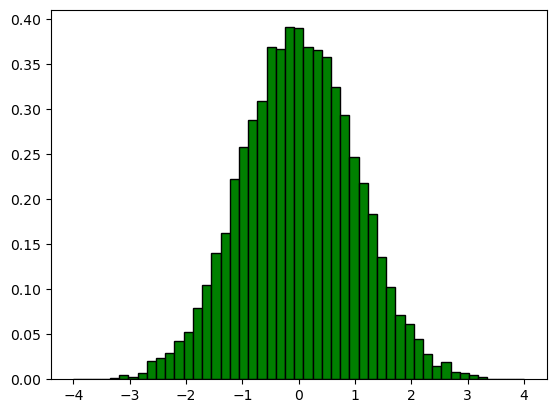

In [5]:
# sample from normal with sample mean and std
data2_prime = None          # TODO

# plot
plt.hist(data2, bins=bin, density=True, alpha=1, color='g', edgecolor='black', label='original data')
plt.hist(data2_prime, bins=bin, density=True, alpha=0.6, color='r', edgecolor='black', label='simulated normal data')
plt.title('Data versus normal histogram'); plt.xlabel('Value'); plt.ylabel('Density'); plt.legend(); plt.show()

# sample from normal with sample mean and std
data2_prime = norm.rvs()          # TODO

# plot
plt.hist(data2, bins=bin, density=True, alpha=1, color='g', edgecolor='black', label='original data')
plt.hist(data2_prime, bins=bin, density=True, alpha=0.6, color='r', edgecolor='black', label='simulated normal data')
plt.title('Data versus normal histogram'); plt.xlabel('Value'); plt.ylabel('Density'); plt.legend(); plt.show()

## 1.3 Kernel Density Estimate (KDE)
**Big idea:** Given some samples $x_1, \dots, x_n$, we can create a guess for what the actual density looks like. They can be smooth/jagged based on your choice of:
1. kernel function (e.g., gaussian, triangle, uniform, ...)
2. bandwidth (small bandwidth will fluctuate and be spikier, large bandwidth will be flatter and smoother)

See the corresponding section notebook for more details.

# 2 Linear Regression
## Step 0: Load (in this case, generate synthetic) data
First, we generate the synthetic data and plot it.

In [ ]:
# Set random seed for reproducibility
np.random.seed(1)

# Define true coefficients (you can change these)
true_a, true_b = 1, 10

# Generate synthetic data
num_samples = 20
x = np.linspace(0, 2, num_samples)
noise = np.random.normal(0, 0.5, num_samples)  # Adding random noise
y = true_a * x + true_b + noise

plt.scatter(x, y, label='Data', c='b')
plt.xlabel('X'); plt.ylabel('Y'); plt.legend(); 
plt.axis('equal'); plt.show()

## Step 1: make augmented X
The linear regression model is
$$ y = a + bX = a \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} + b  \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} .$$

We can rewrite it as $$ y = X' \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} 1  & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix}, $$ i.e., $X'$ is $X$ with a column of 1s augmented to the left.

In [ ]:
# Append a column of ones to x for the bias term
X = None    # TODO how should we initialize array?
X[:,1] = None                      # TODO what should be in the second column?
X

## Step 2: Compute coefficients via magic formula (pseudoinverse)

In [ ]:
# Calculate the coefficients using the pseudoinverse
beta = None        # TODO what is this formula?
a,b = beta
a,b

## Step 3: Use the model! 
We can:
1. predict on test data (plt.scatter)
2. plot the best fit line/curve (plt.plot)

It is basically the same thing. _Usually_, we visualize it differently by using different plotting functions.

In [ ]:
x_test = np.linspace(-0.5, 2.5, 100)
X_test = np.ones((len(x_test),2))
X_test[:,1] = x_test

# Create the regression line
y_test = None              # TODO what is the formula?

# Plot the dataset and regression line
plt.scatter(x, y, label='Data', c='b')
plt.plot(x_test, y_test, label='Regression Line', c='r')
plt.title('Linear Regression'); plt.xlabel('X'); plt.ylabel('Y'); plt.legend(); plt.axis('equal'); 
plt.show()


### Remark: Common mistake in homework
Append column of 1's in the wrong place (on the right instead of the left)
$$ y = X' \begin{bmatrix} a \\ b \end{bmatrix}  
= \begin{bmatrix} x_1 & \color{red}{1} \\ x_2 & \color{red}{1} \\ \vdots & \color{red}{\vdots}  \\ x_n & \color{red}{1} \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix} 
= a \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} + b \color{red}{\begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}} = AX+b.$$


But $aX + b  \neq a + bX$! So this is a different* model. 

* This ia half a lie. It is a different model, but not tooooo different. If you swap the roles $a=b$ and $b=a$, then you fix the issue. The moral of the story is just be careful about where the 1s column is and how you interpret it. If you put it on the right instead of left, you still get something correct, just with swapped numbers.

We demonstrate this swap below


In [ ]:
# demostration for a swapping with b, columns are reversed
X_swap = X[:,[1,0]]
X_swap


In [ ]:
beta_swap = np.linalg.pinv(X_swap) @ y
a_swap, b_swap = beta_swap

# Print the calculated coefficients
print('a + bX model')
print(f"a: {a}")
print(f"b: {b}\n")

print('aX + b model')
print(f"a: {a_swap}")
print(f"b: {b_swap}")


# 3 PCA
Let's use the data points above and  create new array `X`.

In [ ]:
X = np.vstack((x,y))
X.shape

## Step 1: Center the data
## Step 2: Compute covariance matrix
## Step 3: Get eigen information
## Step 4: Use the model! (dimensionality reduction, etc.)

We can do all of this pretty quickly. 
- Respond to the questions commented next to the code

In [ ]:
X_ctd = X - X.mean(axis=1, keepdims=True)       # what is this step doing?
C = None               # TODO what is the formula?
U, D, _ = np.linalg.svd(C)                      # what does U represent? what is D?

U[:,0] = -U[:,0]      # this is just to make the visualization easier, it's still an eigenvector

Let's visualize the PCs

In [ ]:
# Plot the dataset and regression line
plt.scatter(X_ctd[0,:], X_ctd[1,:], c='b')
plt.quiver([0,0], [0,0], U[0,:], U[1,:], color='k', angles='xy', scale_units='xy', scale=1, label='PCs')
plt.title('PCA'); plt.xlabel('X'); plt.ylabel('Y'); plt.axis('equal'); plt.legend()
plt.show()

## 3.2 Projections
We learned that the projection is $U_1U_1^TX$, visualized below.

In [ ]:
P1 = None        # TODO how do we turn the math into code? You may need to do U[:,:1] instead of U[:,0]

plt.scatter(X_ctd[0,:], X_ctd[1,:], c='b')
plt.scatter(P1[0,:], P1[1,:], c='orange', label='projection')
plt.quiver([0,0], [0,0], U[0,:], U[1,:], color='k', angles='xy', scale_units='xy', scale=1, label='PCs')
plt.plot(np.vstack((X_ctd[0,:], P1[0,:])), np.vstack((X_ctd[1,:], P1[1,:])), '--', c='orange')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Projecting onto PC1');plt.legend()
plt.axis('equal'); plt.show()

What happens if we do $U_1^TX$ only? 
- Only 1-dimensional! 

In [ ]:
X_proj = U[:,0].T @ X_ctd
X_proj.shape

- If we plot 1-dimensional X_proj on the x-axis, we see that it is just the **magnitude** of the projections. Which means to say that the 1-dim X-proj (red dots) is just the wrongly rotated version of the true projections (orange dots). 
- The task now tht remains is to multiply the X_proj ($U_1^TX$) to the first principal component ($U_1$)! Thus, we can make sense of the formula $U_1U_1^TX$.
- Hence, we get the orange dots.

In [ ]:
# Plot the dataset and regression line
plt.scatter(X_ctd[0,:], X_ctd[1,:], c='b')
plt.scatter(P1[0,:], P1[1,:], c='orange', label='projection')
plt.scatter(X_proj, np.zeros(num_samples), c='red', label='X_proj')
plt.quiver([0,0], [0,0], U[0,:], U[1,:], color='k', angles='xy', scale_units='xy', scale=1, label='PCs')
plt.title('Linear Regression'); plt.xlabel('X'); plt.ylabel('Y'); plt.axis('equal'); plt.legend()
plt.show()

## 3.3 Scree plot
This plot gives us a way to decide how many principal components we should keep in dimensionality reduction. 

We bring back the spikes dataset that we've seen before and use sklearn PCA.
- Tip: package automatically centers data for you.

In [ ]:
# load data
X = np.loadtxt('spikes.csv', delimiter=',')
n, m = X.shape

# sklearn PCA
pca = None                              # TODO create model and fit in one line
evals, evecs = None, None       # TODO get evals and evecs

Make the plots.

In [ ]:
# explained variance plot, in percentage
exp_var = (evals / np.sum(evals)) * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, n+1), exp_var, align='center',label='Individual Explained Variance')
plt.step(range(1, n+1), cum_exp_var, where='mid', label='Cumulative Explained Variance', color='red')

plt.xlabel('Principal Component Index'); plt.ylabel('Explained Variance %'); plt.legend(loc='best'); 
plt.xticks(range(0,n+1,5))
plt.show()

There is no hard-and-fast rule for how many principal components you should choose when reducing the dimensionality. 
1. Look at where the individual explained variance has an "elbow". **Discuss:** where do you see that in the plot above?
2. Look at where the cumulative variance exceeds some "high enough" value (≈80-90%). **Discuss:** where do you see that in the above plot?

**Further discussion:** 
- In what scenarios would the two approaches for choosing PCs above give the same number? In what situations would they give different numbers?
- What other methods do you know/think we can use to choose the number of PCs?